**Kwadratury**

In [38]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

**Zadanie 1.**

In [42]:
# Data
f = np.vectorize(lambda x: 4/(1+x**2))
true_value = np.pi
a, b = 0.0, 1.0

# Quadratures
def trapezoid(y, x):
    return scipy.integrate.trapezoid(y=y, x=x)

def simpson(y, x):
    return scipy.integrate.simpson(y=y, x=x)

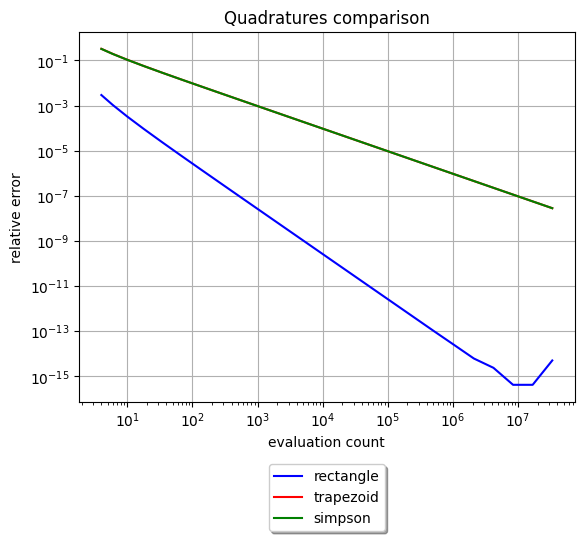

In [53]:
m_range = np.array(range(1, 26))

rectangle_values = []
trapezoid_values = []
simpson_values = []

# Calculations
for m in m_range:
    n = 2**m+1
    h = (b-a)/n
    x = [a + h*(i + 0.5) for i in range(n)]
    y = f(x)
    rectangle_values += [np.sum(h*y)]
    trapezoid_values += [trapezoid(y, x)]
    simpson_values += [simpson(y, x)]

errors_rect = np.array(np.abs(true_value-np.array(rectangle_values))/true_value)
errors_trap = np.array(np.abs(true_value-np.array(trapezoid_values))/true_value)
errors_simp = np.array(np.abs(true_value-np.array(simpson_values))/true_value)

# Plot
plt.title("Quadratures comparison")
plt.plot((2**m_range+1)/(b-a) + 1, errors_rect, color='blue', label='rectangle')
plt.plot((2**m_range+1)/(b-a) + 1, errors_trap, color='red', label='trapezoid')
plt.plot((2**m_range+1)/(b-a) + 1, errors_simp, color='green', label='simpson')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('evaluation count')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()


In [77]:
p_rect = []
p_trap = []
p_simp = []

Q = lambda T, i, j: np.log(T[j]/T[i]) / np.log(2)


for i in range(len(m_range)):
    for j in range(i+1, len(m_range)):
        p_rect += [Q(errors_rect, i, j)]
        p_trap += [Q(errors_trap, i, j)]
        p_simp += [Q(errors_simp, i, j)]


print(p_rect)
print(p_trap)
print(p_simp)

[-1.4735631738356703, -3.1695088567154346, -5.00457986326205, -6.9184420491220235, -8.874389410240125, -10.852108293194005, -12.840902880725043, -14.835283810966692, -16.83247016844489, -18.831062319695626, -20.83035805118848, -22.830006045816816, -24.829828527300936, -26.829741840149765, -28.829675796292452, -30.82960975545836, -32.82894951333394, -34.82894951333394, -36.801747785775305, -38.78525966298673, -40.15722844037369, -42.659728780902874, -42.659728780902874, -39.07476628018172, -1.6959456828797645, -3.5310166894263797, -5.444878875286354, -7.400826236404454, -9.378545119358336, -11.367339706889373, -13.36172063713102, -15.35890699460922, -17.357499145859958, -19.35679487735281, -21.356442871981145, -23.356265353465268, -25.356178666314097, -27.35611262245678, -29.35604658162269, -31.35538633949827, -33.35538633949827, -35.32818461193963, -37.31169648915107, -38.68366526653802, -41.18616560706721, -41.18616560706721, -37.60120310634605, -1.8350710065466158, -3.748933192406588

**Zadanie 2.**

In [ ]:
# abc